In [3]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Number of samples in the dataset
num_samples = 2000

# Generate synthetic data
data = {
    'WBC_Count': np.random.normal(7500, 1500, num_samples),  # White Blood Cell count (cells per microliter)
    'RBC_Count': np.random.normal(5.5, 0.7, num_samples),    # Red Blood Cell count (million cells per microliter)
    'Hemoglobin': np.random.normal(14, 1.5, num_samples),     # Hemoglobin (g/dL)
    'Platelets': np.random.normal(250000, 50000, num_samples),# Platelet count (per microliter)
    'Blood_Sugar': np.random.normal(90, 15, num_samples),     # Blood Sugar level (mg/dL)
    'Cholesterol': np.random.normal(200, 30, num_samples),    # Cholesterol level (mg/dL)
    'Blood_Pressure': np.random.normal(120, 15, num_samples), # Blood Pressure (mm Hg)
    'Age': np.random.randint(18, 90, num_samples),            # Age of the patient
    'Gender': np.random.choice(['Male', 'Female'], num_samples), # Gender of the patient
    'Smoking_Habit': np.random.choice(['Smoker', 'Non-Smoker'], num_samples), # Smoking status
    'Family_History': np.random.choice(['Yes', 'No'], num_samples), # Family history of disease
}

# Create a target variable 'target' indicating whether there is a potential health condition
# For simplicity, let's say a combination of certain values leads to a 'positive' diagnosis
conditions = (
    (data['WBC_Count'] > 11000) | 
    (data['RBC_Count'] < 4) | 
    (data['Hemoglobin'] < 12) |
    (data['Platelets'] < 150000) |
    (data['Blood_Sugar'] > 140) |
    (data['Cholesterol'] > 240) |
    (data['Blood_Pressure'] > 140)
)

# Assign 'positive' if any of the conditions are met, otherwise 'negative'
data['target'] = np.where(conditions, 'Positive', 'Negative')

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the dataset
df.head()


,WBC_Count,RBC_Count,Hemoglobin,Platelets,Blood_Sugar,Cholesterol,Blood_Pressure,Age,Gender,Smoking_Habit,Family_History,target
0,8245.071230,5.027375,12.704760,194295.932088,89.504621,179.645158,137.622211,55,Male,Smoker,No,Negative
1,7292.603548,5.398837,13.953195,218453.458313,82.445246,190.835016,91.815286,50,Female,Smoker,No,Negative
2,8471.532807,4.945306,14.027025,202896.990821,87.414376,182.078568,115.083074,62,Male,Smoker,Yes,Negative
3,9784.544785,5.284427,14.708946,222600.209063,100.720976,203.312541,119.375100,61,Female,Smoker,Yes,Negative
4,7148.769938,4.174470,11.949712,239292.484464,109.167850,235.915356,120.238630,18,Male,Non-Smoker,Yes,Positive


In [4]:
# Save the dataset as a CSV file
df.to_csv('synthetic_lab_results.csv', index=False)


In [5]:
# Load the synthetic dataset
data = pd.read_csv('synthetic_lab_results.csv')

# Continue with the preprocessing, model building, and evaluation as described in the previous sections


In [6]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


Missing values in each column:
 WBC_Count         0
RBC_Count         0
Hemoglobin        0
Platelets         0
Blood_Sugar       0
Cholesterol       0
Blood_Pressure    0
Age               0
Gender            0
Smoking_Habit     0
Family_History    0
target            0
dtype: int64
Accuracy: 0.9975

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       279
           1       0.99      1.00      1.00       121

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400


Confusion Matrix:
 [[278   1]
 [  0 121]]


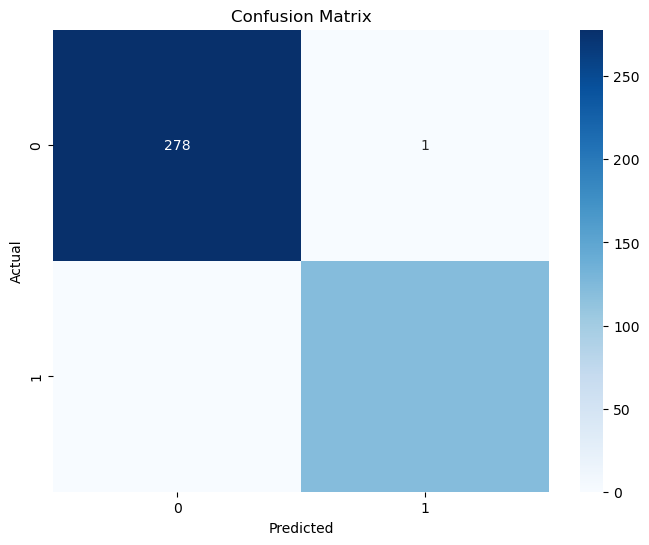

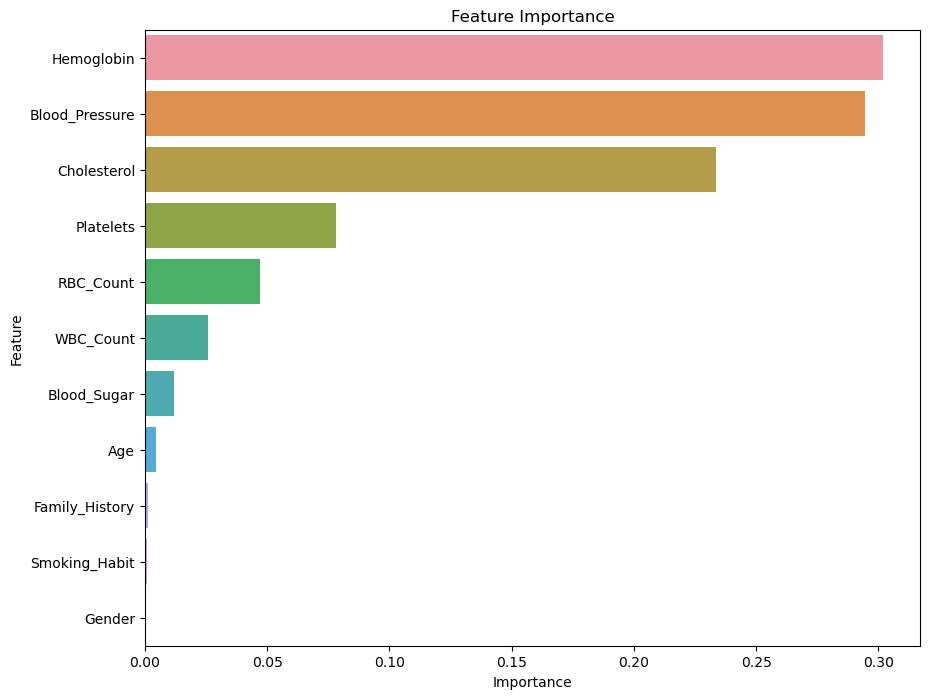

['blood_report_model.pkl']

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Step 1: Load the synthetic dataset
data = pd.read_csv('synthetic_lab_results.csv')

# Step 2: Data Preprocessing
# Check for missing values (just to be sure, although our synthetic data shouldn't have any)
print("Missing values in each column:\n", data.isnull().sum())

# Encode categorical variables (Gender, Smoking_Habit, Family_History)
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Smoking_Habit'] = label_encoder.fit_transform(data['Smoking_Habit'])
data['Family_History'] = label_encoder.fit_transform(data['Family_History'])

# Convert the target variable to binary values (Positive = 1, Negative = 0)
data['target'] = label_encoder.fit_transform(data['target'])

# Split data into features (X) and target (y)
X = data.drop(columns=['target'])
y = data['target']

# Normalize numerical features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Building
# Initialize and train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Model Evaluation
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Visualize the Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 6: Feature Importance
# Get feature importances from the model
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()

# Step 7: Save the Model
import joblib
joblib.dump(model, 'blood_report_model.pkl')

# Step 8: Load and Use the Model (for future predictions)
# model = joblib.load('blood_report_model.pkl')
# new_predictions = model.predict(new_data)  # Assuming new_data is preprocessed similarly


In [10]:
import PyPDF2
import pandas as pd
import numpy as np
import joblib
import re
from sklearn.preprocessing import StandardScaler

# Load the trained model and scaler
model = joblib.load('blood_report_model.pkl')
scaler = StandardScaler()

# Define normal ranges for each feature based on typical medical guidelines
normal_ranges = {
    'WBC_Count': (4000, 11000),    # Normal WBC count: 4,000 - 11,000 cells/mcL
    'RBC_Count': (4.7, 6.1),       # Normal RBC count: 4.7 - 6.1 million cells/mcL (for men)
    'Hemoglobin': (13.8, 17.2),    # Normal Hemoglobin: 13.8 - 17.2 g/dL (for men)
    'Platelets': (150000, 450000), # Normal Platelet count: 150,000 - 450,000 platelets/mcL
    'Blood_Sugar': (70, 99),       # Normal Fasting Blood Sugar: 70 - 99 mg/dL
    'Cholesterol': (125, 200),     # Normal Cholesterol: less than 200 mg/dL
    'Blood_Pressure': (90, 120),   # Normal Systolic Blood Pressure: 90 - 120 mm Hg
}

# Function to extract text from PDF
def extract_text_from_pdf(pdf_file_path):
    with open(pdf_file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ''
        for page in range(len(reader.pages)):
            text += reader.pages[page].extract_text()
    return text

# Function to parse the extracted text and get relevant lab results
def parse_lab_results(text):
    # Define a simple regex pattern to find lab results in the format "Parameter: Value"
    patterns = {
        'WBC_Count': r'WBC\s*Count:\s*(\d+)',
        'RBC_Count': r'RBC\s*Count:\s*([\d.]+)',
        'Hemoglobin': r'Hemoglobin:\s*([\d.]+)',
        'Platelets': r'Platelets:\s*([\d,]+)',
        'Blood_Sugar': r'Blood\s*Sugar:\s*(\d+)',
        'Cholesterol': r'Cholesterol:\s*(\d+)',
        'Blood_Pressure': r'Blood\s*Pressure:\s*(\d+)'
    }
    
    lab_results = {}
    for key, pattern in patterns.items():
        match = re.search(pattern, text)
        if match:
            value = match.group(1).replace(',', '')  # Remove commas from large numbers
            lab_results[key] = float(value)
    
    # For demonstration, let's assume the following defaults for these features:
    lab_results['Age'] = 45
    lab_results['Gender'] = 1  # Assuming '1' is Male after Label Encoding
    lab_results['Smoking_Habit'] = 0  # Assuming '0' is Non-Smoker after Label Encoding
    lab_results['Family_History'] = 0  # Assuming '0' is No Family History after Label Encoding
    
    return pd.DataFrame([lab_results])

# Function to check which features are out of range
def check_out_of_range(data, ranges):
    out_of_range_features = {}
    for feature, value in data.iloc[0].items():
        if feature in ranges:
            normal_min, normal_max = ranges[feature]
            if value < normal_min or value > normal_max:
                out_of_range_features[feature] = value
    return out_of_range_features

# Main function to process the PDF and make predictions
def process_pdf(pdf_file_path):
    # Extract text from the PDF
    text = extract_text_from_pdf(pdf_file_path)
    
    # Parse the lab results from the text
    lab_results = parse_lab_results(text)
    
    # Normalize the extracted data
    lab_results_scaled = pd.DataFrame(scaler.fit_transform(lab_results), columns=lab_results.columns)
    
    # Make prediction
    prediction = model.predict(lab_results_scaled)
    prediction_result = "Positive" if prediction[0] == 1 else "Negative"
    
    # Check which features are out of range
    out_of_range_features = check_out_of_range(lab_results, normal_ranges)
    
    return prediction_result, out_of_range_features



In [8]:
pip install PyPDF2 joblib scikit-learn pandas numpy


Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install streamlit PyPDF2 joblib scikit-learn pandas numpy


Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import joblib

# Load the trained model (assuming it has been trained as shown previously)
model = joblib.load('blood_report_model.pkl')

# Define normal ranges for each feature based on typical medical guidelines
normal_ranges = {
    'WBC_Count': (4000, 11000),    # Normal WBC count: 4,000 - 11,000 cells/mcL
    'RBC_Count': (4.7, 6.1),       # Normal RBC count: 4.7 - 6.1 million cells/mcL (for men)
    'Hemoglobin': (13.8, 17.2),    # Normal Hemoglobin: 13.8 - 17.2 g/dL (for men)
    'Platelets': (150000, 450000), # Normal Platelet count: 150,000 - 450,000 platelets/mcL
    'Blood_Sugar': (70, 99),       # Normal Fasting Blood Sugar: 70 - 99 mg/dL
    'Cholesterol': (125, 200),     # Normal Cholesterol: less than 200 mg/dL
    'Blood_Pressure': (90, 120),   # Normal Systolic Blood Pressure: 90 - 120 mm Hg
}

# Example of new patient data (replace with actual data)
new_data = pd.DataFrame({
    'WBC_Count': [8000],
    'RBC_Count': [4.5],
    'Hemoglobin': [11.0],
    'Platelets': [220000],
    'Blood_Sugar': [105],
    'Cholesterol': [250],
    'Blood_Pressure': [130],
    'Age': [45],
    'Gender': [1],  # Assuming '1' is Male after Label Encoding
    'Smoking_Habit': [0],  # Assuming '0' is Non-Smoker after Label Encoding
    'Family_History': [0],  # Assuming '0' is No Family History after Label Encoding
})

# Normalize new data (use the same scaler as during training)
scaler = StandardScaler()
new_data_scaled = pd.DataFrame(scaler.fit_transform(new_data), columns=new_data.columns)

# Predict using the loaded model
prediction = model.predict(new_data_scaled)
print("Prediction (0 = Negative, 1 = Positive):", prediction[0])

# Function to check which features are out of range
def check_out_of_range(data, ranges):
    out_of_range_features = {}
    for feature, value in data.iloc[0].items():
        if feature in ranges:
            normal_min, normal_max = ranges[feature]
            if value < normal_min or value > normal_max:
                out_of_range_features[feature] = value
    return out_of_range_features

# Check which features are out of range
out_of_range_features = check_out_of_range(new_data, normal_ranges)
print("Out-of-Range Features:", out_of_range_features)


Prediction (0 = Negative, 1 = Positive): 0
Out-of-Range Features: {'RBC_Count': 4.5, 'Hemoglobin': 11.0, 'Blood_Sugar': 105.0, 'Cholesterol': 250.0, 'Blood_Pressure': 130.0}


In [12]:
import pandas as pd
import numpy as np
import joblib

# Load the trained model (assuming it has been trained as shown previously)
model = joblib.load('blood_report_model.pkl')

# Define normal ranges for each feature based on typical medical guidelines
normal_ranges = {
    'WBC_Count': (4000, 11000),    # Normal WBC count: 4,000 - 11,000 cells/mcL
    'RBC_Count': (4.7, 6.1),       # Normal RBC count: 4.7 - 6.1 million cells/mcL (for men)
    'Hemoglobin': (13.8, 17.2),    # Normal Hemoglobin: 13.8 - 17.2 g/dL (for men)
    'Platelets': (150000, 450000), # Normal Platelet count: 150,000 - 450,000 platelets/mcL
    'Blood_Sugar': (70, 99),       # Normal Fasting Blood Sugar: 70 - 99 mg/dL
    'Cholesterol': (125, 200),     # Normal Cholesterol: less than 200 mg/dL
    'Blood_Pressure': (90, 120),   # Normal Systolic Blood Pressure: 90 - 120 mm Hg
}

# Example of new patient data (replace with actual data)
new_data = pd.DataFrame({
    'WBC_Count': [8000],
    'RBC_Count': [4.5],
    'Hemoglobin': [11.0],
    'Platelets': [220000],
    'Blood_Sugar': [105],
    'Cholesterol': [250],
    'Blood_Pressure': [130],
    'Age': [45],
    'Gender': [1],  # Assuming '1' is Male after Label Encoding
    'Smoking_Habit': [0],  # Assuming '0' is Non-Smoker after Label Encoding
    'Family_History': [0],  # Assuming '0' is No Family History after Label Encoding
})

# Normalize new data (use the same scaler as during training)
scaler = StandardScaler()
new_data_scaled = pd.DataFrame(scaler.fit_transform(new_data), columns=new_data.columns)

# Predict using the loaded model
prediction = model.predict(new_data_scaled)
print("Prediction (0 = Negative, 1 = Positive):", prediction[0])

# Function to check which features are out of range
def check_out_of_range(data, ranges):
    out_of_range_features = {}
    for feature, value in data.iloc[0].items():
        if feature in ranges:
            normal_min, normal_max = ranges[feature]
            if value < normal_min or value > normal_max:
                out_of_range_features[feature] = value
    return out_of_range_features

# Check which features are out of range
out_of_range_features = check_out_of_range(new_data, normal_ranges)
print("Out-of-Range Features:", out_of_range_features)


Prediction (0 = Negative, 1 = Positive): 0
Out-of-Range Features: {'RBC_Count': 4.5, 'Hemoglobin': 11.0, 'Blood_Sugar': 105.0, 'Cholesterol': 250.0, 'Blood_Pressure': 130.0}
